imports

In [1]:
import pandas as pd
import seaborn as sns

writer = pd.ExcelWriter('./results/data_of_corrects.xlsx', engine='xlsxwriter')

config

In [2]:
config_datasheet = r'./results/preprocessed/preprocessed_pretest.xlsx'

import df

In [3]:
raw = pd.read_excel(config_datasheet)
df = pd.DataFrame(raw)
df = df.loc[df["Correctness"]==True]
total_df = df
df.to_excel(writer, sheet_name="corrects", index=False)


get names of algorithm

In [4]:
algo_name_array = [name for name in df["Algorithm"].unique()]

create result

In [6]:
cols = ["Algorithm", "Comprehension",
        "rec correct", "rec total Answers", "rec percent", "R_ResponseTimeMean", "R_ResponseTimeDeviation",
        "it correct", "it total Answers", "it percent", "I_ResponseTimeMean", "I_ResponseTimeDeviation"]

result_df = pd.DataFrame(columns=cols)

count_cols = ["Algorithm", "Comprehension", "Programming", "Right", "Total"]
count_df = pd.DataFrame(columns=count_cols)

for algo_df_array in df_algo_cat_array:
    for i in range(2):
        rec =  algo_df_array[i*2+0]
        it =  algo_df_array[i*2+1]
        
        Algorithm = rec.iloc[0]["Algorithm"]
        Comprehension = "Bottom-Up"
        if i == 1:
            Comprehension = "Top-Down"
            
        count_df = count_df.append(pd.DataFrame([[Algorithm, Comprehension, "R", len(rec.loc[rec["Correctness"]==True]) ,len(rec)]], columns=count_cols))
        count_df = count_df.append(pd.DataFrame([[Algorithm, Comprehension, "I", len(it.loc[it["Correctness"]==True]) ,len(it)]], columns=count_cols))
        
        R_ResponseTimeMean = int(rec["ResponseTime"].mean())
        R_ResponseTimeDeviation = int(rec["ResponseTime"].std())
        
        I_ResponseTimeMean = int(it["ResponseTime"].mean())
        I_ResponseTimeDeviation = int(it["ResponseTime"].std())
        
        rec_cor = len(rec.loc[rec["Correctness"]==True])
        rec_total = len(rec)
        rec_percent = rec_cor/rec_total
        
        it_cor = len(it.loc[it["Correctness"]==True])
        it_total = len(it)
        it_percent = it_cor/it_total
        
        data = [
            Algorithm, Comprehension,
            rec_cor, rec_total, rec_percent, R_ResponseTimeMean, R_ResponseTimeDeviation,
            it_cor, it_total, it_percent, I_ResponseTimeMean, I_ResponseTimeDeviation,
        ]
        
        result_df = result_df.append(pd.DataFrame([data], columns=cols))
        



for i in range(2):
    rec =  df_cat_array[i*2+0]
    it =  df_cat_array[i*2+1]
    
    Algorithm = "Total"
    Comprehension = "Top-Down"
    if i == 1:
        Comprehension = "Bottom-Up"
    
    R_ResponseTimeMean = int(rec["ResponseTime"].mean())
    R_ResponseTimeDeviation = int(rec["ResponseTime"].std())
    
    I_ResponseTimeMean = int(it["ResponseTime"].mean())
    I_ResponseTimeDeviation = int(it["ResponseTime"].std())
    
    rec_cor = len(rec.loc[rec["Correctness"]==True])
    rec_total = len(rec)
    rec_percent = rec_cor/rec_total
    
    it_cor = len(it.loc[it["Correctness"]==True])
    it_total = len(it)
    it_percent = it_cor/it_total
    
    data = [
        Algorithm, Comprehension,
        rec_cor, rec_total, rec_percent, R_ResponseTimeMean, R_ResponseTimeDeviation,
        it_cor, it_total, it_percent, I_ResponseTimeMean, I_ResponseTimeDeviation,
    ]
    
    result_df = result_df.append(pd.DataFrame([data], columns=cols))
    
df_recursive = df_array_independent[0]     
df_recursive = df_recursive.append(df_array_independent[2])

df_iterative = df_array_independent[1]     
df_iterative = df_iterative.append(df_array_independent[3])

rec_cor = len(df_recursive.loc[df_recursive["Correctness"]==True])
rec_total = len(df_recursive)
rec_percent = rec_cor/rec_total

it_cor = len(df_iterative.loc[df_iterative["Correctness"]==True])
it_total = len(df_iterative)
it_percent = it_cor/it_total

result_df = result_df.append(pd.DataFrame(
    [["Total", "Total",
    rec_cor, rec_total, rec_percent, int(df_recursive["ResponseTime"].mean()), int(df_recursive["ResponseTime"].std()),
    it_cor, it_total, it_percent, int(df_iterative["ResponseTime"].mean()), int(df_iterative["ResponseTime"].std())]],
    columns=cols))

print("Write total means to excel sheet")
result_df.to_excel(writer, sheet_name="corrects.info")
writer.save()
result_df

Write total means to excel sheet


Algorithm Comprehension rec correct rec total Answers  rec percent  \
0    BinarySearch     Bottom-Up           7                 7          1.0   
0    BinarySearch      Top-Down           3                 3          1.0   
0      BubbleSort     Bottom-Up          13                13          1.0   
0      BubbleSort      Top-Down          17                17          1.0   
0       Factorial     Bottom-Up          24                24          1.0   
0       Factorial      Top-Down          25                25          1.0   
0       Fibonacci     Bottom-Up          13                13          1.0   
0       Fibonacci      Top-Down          16                16          1.0   
0   IntegerBinary     Bottom-Up           7                 7          1.0   
0   IntegerBinary      Top-Down          12                12          1.0   
0  MultiplyMatrix     Bottom-Up           4                 4          1.0   
0  MultiplyMatrix      Top-Down           5                 5          1.0   
0    PrimeFactors     Bottom-Up           4                 4          1.0   
0    PrimeFactors      Top-Down           5                 5          1.0   
0   ReverseString     Bottom-Up          15                15          1.0   
0   ReverseString      Top-Down          12                12          1.0   
0           Total      Top-Down          87                87          1.0   
0           Total     Bottom-Up          95                95          1.0   
0           Total         Total         182               182          1.0   

  R_ResponseTimeMean R_ResponseTimeDeviation it correct it total Answers  \
0                441                     201          3                3   
0                202                      99          9                9   
0                260                     156          8                8   
0                 27                      28         16               16   
0                132                     251         27               27   
0                 77                      35         19               19   
0                180                     143         18               18   
0                200                     154         23               23   
0                420                     516          7                7   
0                130                      92         12               12   
0                550                      88          8                8   
0                596                     367          4                4   
0                142                      71          3                3   
0                315                     371          5                5   
0                217                     190         22               22   
0                250                     264         23               23   
0                241                     256         96               96   
0                161                     207        111              111   
0                199                     235        207              207   

   it percent I_ResponseTimeMean I_ResponseTimeDeviation  
0         1.0                283                     261  
0         1.0                322                     301  
0         1.0                261                     218  
0         1.0                401                     492  
0         1.0                139                     105  
0         1.0                109                      78  
0         1.0                240                     144  
0         1.0                180                     113  
0         1.0                399                     403  
0         1.0                210                      98  
0         1.0                464                     357  
0         1.0                256                     134  
0         1.0                510                     369  
0         1.0                166                     133  
0         1.0                224         

In [7]:
import matplotlib.pyplot as plt


combine_lambda = lambda x: '{}_{}'.format(x["Comprehension"], x["ProgrammingStyle"])
total_df.insert(loc=6, column="ProgrammingStyle x Comprehension", value=total_df.apply(combine_lambda, axis = 1))
total_df = total_df.loc[total_df["ResponseTime"] < 500]

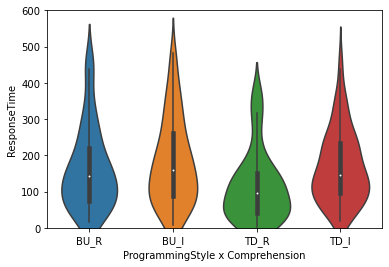

In [8]:
plt.ylim(0, 600)
ax = sns.violinplot(x="ProgrammingStyle x Comprehension", y="ResponseTime", data=total_df)
plt.savefig("results/behavioral/violin_of_right.pdf", bbox_inches='tight', pad_inches=0.01)

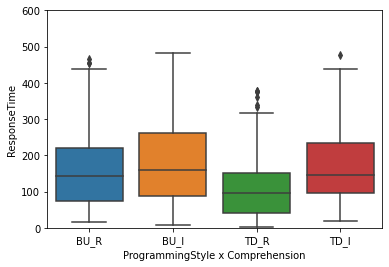

In [9]:
plt.ylim(0, 600)
ax = sns.boxplot(x="ProgrammingStyle x Comprehension", y="ResponseTime", data=total_df)
plt.savefig("results/behavioral/box_of_right.pdf", bbox_inches='tight', pad_inches=0.01)

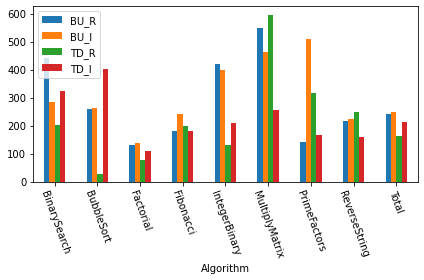

In [10]:
cols = ["Algorithm", "BU_R", "BU_I", "TD_R", "TD_I"]
bar_df = pd.DataFrame([], columns=cols)

for i in range(int(len(result_df[:-1])/2)):
    idx = 2*i
    algorithm = result_df.iloc[idx]["Algorithm"]
    BU_I = result_df.iloc[idx]["I_ResponseTimeMean"]
    BU_R = result_df.iloc[idx]["R_ResponseTimeMean"]
    TD_I = result_df.iloc[idx + 1]["I_ResponseTimeMean"]
    TD_R = result_df.iloc[idx + 1]["R_ResponseTimeMean"]
    
    bar_df = bar_df.append(pd.DataFrame([[algorithm, BU_R, BU_I, TD_R, TD_I]], columns=cols))

bar_df = bar_df.set_index('Algorithm')
ax = bar_df.plot.bar(rot=290)
plt.tight_layout()
ax.legend(loc="upper left")
plt.savefig("results/behavioral/bar_response_of_right.pdf", bbox_inches='tight', pad_inches=0.01)